#Mobile Price Range Prediction

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/mobile_price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
df.drop(df[df['sc_w']==0].index, inplace = True)  #dropping the record that has sc_w=0 

In [7]:
df.shape

(1820, 21)

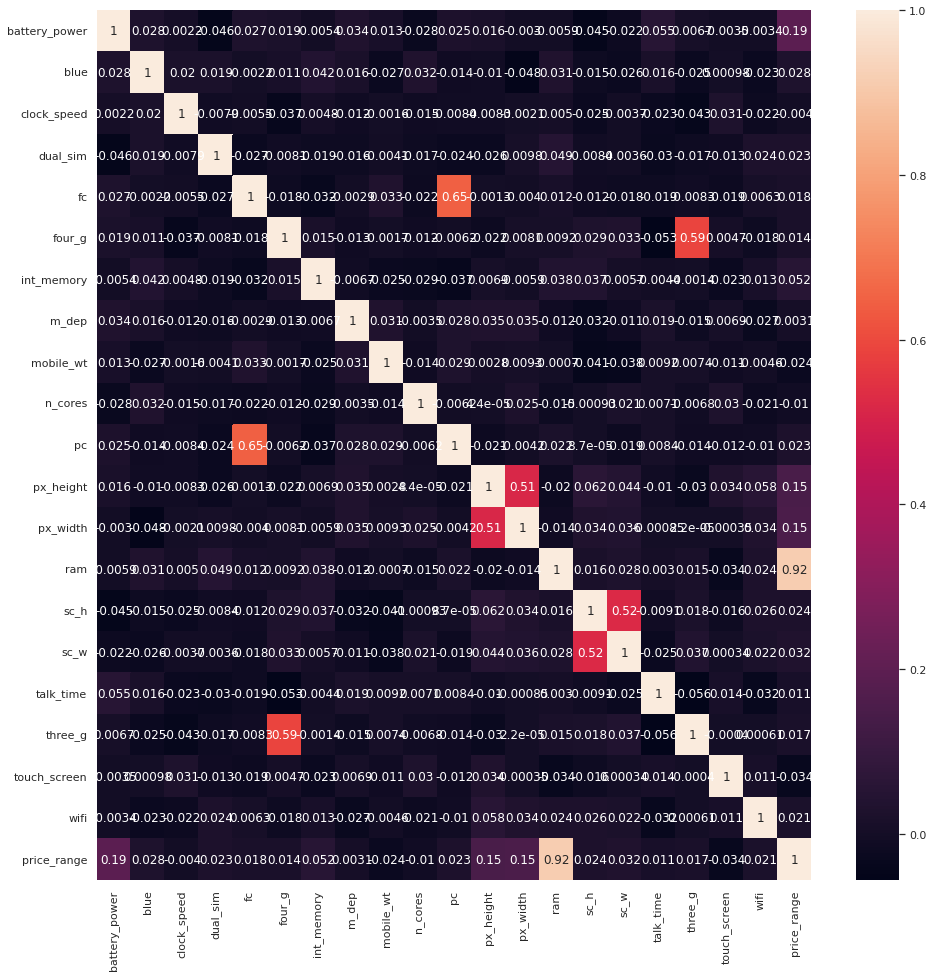

In [8]:
corr=df.corr()
sns.set(rc={'figure.figsize':(16,16)})
sns.heatmap(corr,annot=True)

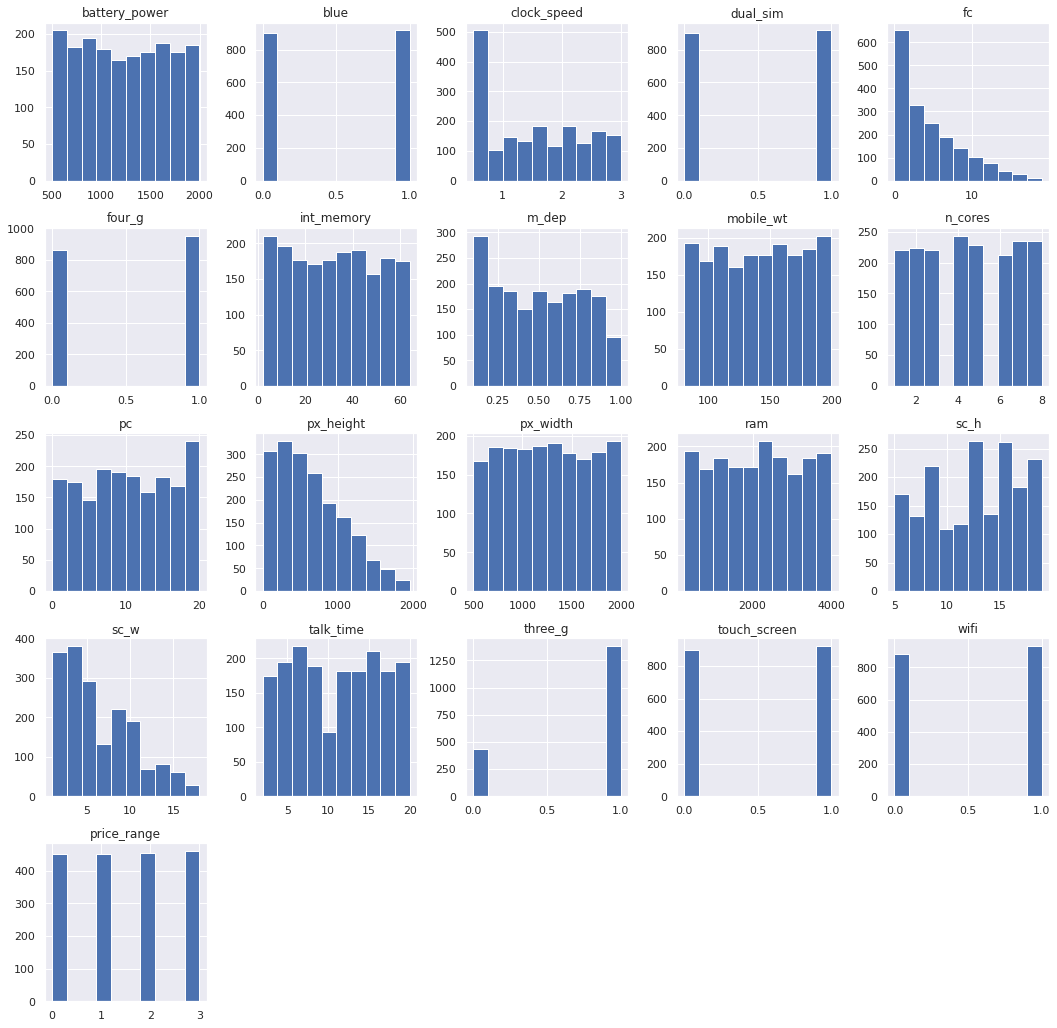

In [9]:
df.hist(figsize=(18,18))
plt.show()

### **Defining and preprocessing input-output features**

After reading and inspecting the dataset, let’s define the input (X) features except price_range and clock_speed and output (y) feature as the price_range columns.

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['price_range','clock_speed'],axis=1)     # Predictor feature columns (8 X m)

Y = df['price_range']   # Predicted class (1=True, 0=False) (1 X m)
# we will define training and testing patterns using the train_test_split method.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


### **Initializing and training Gaussian Naive Bayes Classifier**

Here we will import the Gaussian Naive Bayes classifier from the sklearn library and after initializing it, will train model.

In [11]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
mobile= GaussianNB()

mobile.fit(x_train, y_train.ravel())

GaussianNB()

In [12]:
# Making predictions with the test data
mobile_train_predict = mobile.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, mobile_train_predict)))
print()

Model Accuracy: 0.8226



In [13]:
mobile_test_predict = mobile.predict(x_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, mobile_test_predict)))


Model Accuracy: 0.7857


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


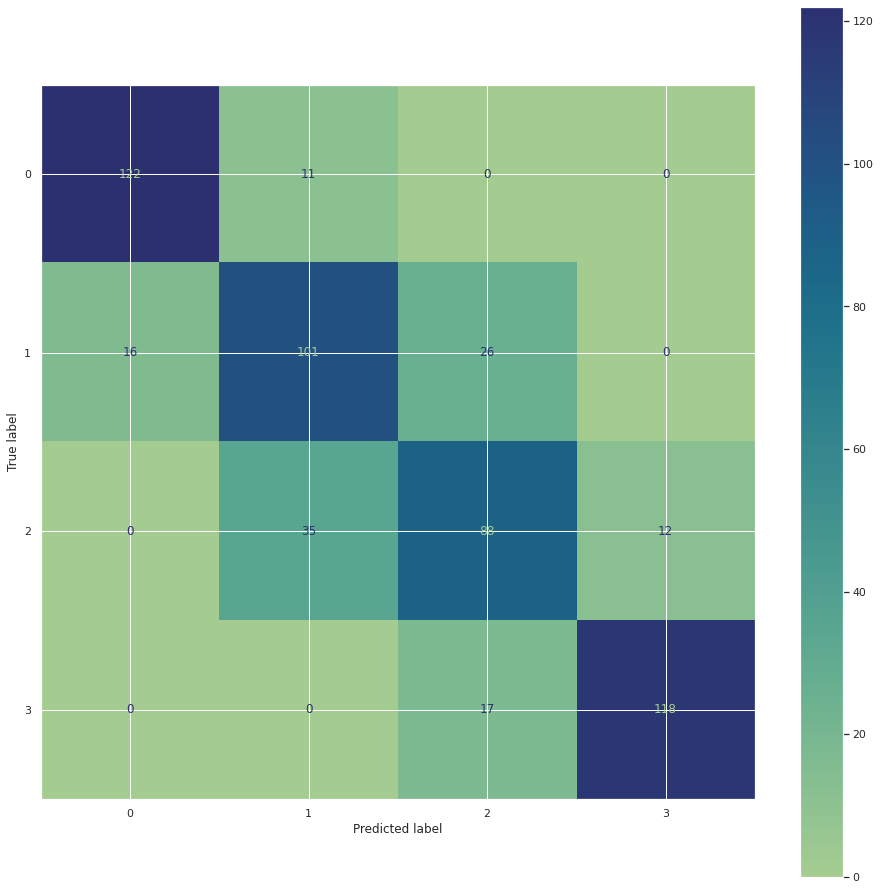

In [27]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mobile, x_test, y_test,cmap='crest')

So out of 546 records, 122+101+88+118=429 records predicted correctly 

### **The classification report for analyzing the performance of this classifier.**

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,mobile_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       133
           1       0.69      0.71      0.70       143
           2       0.67      0.65      0.66       135
           3       0.91      0.87      0.89       135

    accuracy                           0.79       546
   macro avg       0.79      0.79      0.79       546
weighted avg       0.79      0.79      0.79       546



From the above report, we can conclude that the Gaussian Naive Bayes classifier has performed well on predicting the class labels. 